# Part3 -- DataAnalytics

   * > #### 1. Preparation of data
   * > #### 2. Data acquisition, preservation
   * > #### 3. Cleaning of data
   * > #### 4. Statistics on differences in stock data

## 1. Preparation of data

   * ### Sina Finance Stock Data API Interface  
     Introduction to the #### API.
     #### The meaning of this list from the first element in this order to the last element is as follows. (The beginning is the index value)
     * #### 0: "Daqin Railway", the name of the stock.
     * #### 1: "27.55″, today's opening price.
     * #### 2: "27.25″, yesterday's closing price.
     * #### 3: "26.91″, current price.
     * #### 4: "27.55″, today's high price.
     * #### 5: "26.20″, today's low; * #### 5: "26.20″, today's low.
     * #### 6: "26.91″, the bid price, i.e. "buy one" offer.
     * #### 7: "26.92″, the bid price, i.e. "sell one" offer.
     * #### 8: "22114263″, the number of shares traded, which is usually divided by one hundred when used as the basic unit of stock trading is one hundred shares.
     * #### 9: "589824680″, the amount of the transaction, in "yuan", which is usually divided by 10,000, as "ten thousand" is the unit of the transaction amount for the sake of clarity.
     * #### 10: "4695″, "buy one" request for 4695 shares, i.e. 47 lots.
     * #### 11: "26.91″, a "buy one" quote.
     * #### 12: "57590″, "Buy 2"
     * #### 13: "26.90″, "Buy Two"
     * #### 14: "14700″, "Buy 3"
     * #### 15: "26.89″, "Buy Three"
     * #### 16: "14300″, "Buy 4"
     * #### 17: "26.88″, "buy four"
     * #### 18: "15,100″, "Buy Five"
     * #### 19: "26.87″, "Buy Five"
     * #### 20: "3100″, "Sell One" for 3100 shares, i.e. 31 lots.
     * #### 21: "26.92″, "Sell One" quote
     * #### (22, 23), (24, 25), (26, 27), (28, 29) for "Sell 2" to "Sell 4" respectively
     * #### 30: "2008-01-11", date.
     * #### 31: "15:05:32″, time.
     #### In addition, there is an API for getting historical stock data as follows
     
        url = 'http://money.finance.sina.com.cn/quotes_service/api/json_v2.php' \
              '/CN_MarketData.getKLineData?symbol={0}&scale={1}&ma={2}&datalen=' \
              '{3}'.format(self.code, self.scale, self.ma, self.datalen)
              
     #### shows that in the composition of the URL of this API, code represents the stock code, scale represents the time interval (in minutes), ma is the average value (can be 5, 10, 15, 20, 25), and datalen is the number of data fetched at one time.
     #### is also accessed using the requests library, which gives json data with a structure similar to the following
     
     [{"day": "2022-01-10 15:00:00", "open": "24.680", "high": "25.140", "low": "24.380", "close": "25.140", "volume": "3965150", "ma_price20": 21.105, "ma_volume20":3964285}]
     
     #### shows that the API will return a list which holds datalen data. Each entry is a json dictionary containing the following main fields
     * #### day: time
     * #### open: the opening price
     * #### high: the highest share price for the time period
     * #### low: the lowest share price at that time
     * #### close: the closing price
     * #### volume: volume
     * #### ma_price20: average price
     * #### ma_volume20: average number of shares traded
     #### It is worth noting that the volume is in hundreds of shares.

In [1]:
import socket
import time
import pandas as pd
import csv
import matplotlib.pyplot as plt
import requests

#### A GET request to this API using the Python third party library 'requests' gives the following feedback data.
     var hq_str_sh601006="XXX, 27.55, 27.25, 26.91, 27.55, 26.20, 26.91, 26.92,22114263, 589824680, 4695, 26.91, 57590, 26.90, 14700, 26.89, 14300, 26.88, 15100, 26.87, 3100, 26.92, 8900, 26.93, 14230, 26.94, 25150, 26.95, 15220, 26.96, 2008-01-11, 15:05:32";

#### This string consists of many pieces of data stitched together, with the different meanings separated by commas. Using Python's built-in library split to split the string, you can get the list
     var = ['XXX', '27.55', '27.25', '26.91', '27.55', '26.20', '26.91', '26.92', '22114263', '589824680', '4695', '26.91', '57590', '26.90', '14700', ' 26.89', '14300', '26.88', '15100', '26.87', '3100', '26.92', '8900', '26.93', '14230', '26.94', '25150', '26.95', '15220', '26.96', '2008-01-11', '15:05:32']

In [2]:
HTML = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Part3 Analysis Report</title>
    <script src="https://matthewyt.pythonanywhere.com/static/echarts.js"></script>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.1/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-+0n0xVW2eSR5OomGNYDnhzAbDsOXxcvSN1TPprVMTNDbiYZCxYbOOl7+AMvyTG2x" crossorigin="anonymous">
    <style>
    .container{
        max-width: 960px;
    }

    </style>
</head>

<body>


<div class="container">
  <main>
    <section class="py-5 text-center container">
    <div class="row py-lg-5">
      <div class="col-lg-6 col-md-8 mx-auto">
        <h1 class="fw-light">Part3 Analysis Report</h1>
        <p class="lead text-muted">By&nbsp;yingtong.</p>
        <p>
        </p>
      </div>
    </div>
  </section>

<div style="height: 30px"></div>

<div id="mainnew" style="height:350px;width:100%"></div>

<script>
var myChart = echarts.init(document.getElementById('mainnew'));
const upColor = '#ec0000';
const upBorderColor = '#8A0000';
const downColor = '#00da3c';
const downBorderColor = '#008F28';
// Each item: open，close，lowest，highest
const data0 = splitData(
    @data
);
function splitData(rawData) {
  const categoryData = [];
  const values = [];
  for (var i = 0; i < rawData.length; i++) {
    categoryData.push(rawData[i].splice(0, 1)[0]);
    values.push(rawData[i]);
  }
  return {
    categoryData: categoryData,
    values: values
  };
}
function calculateMA(dayCount) {
  var result = [];
  for (var i = 0, len = data0.values.length; i < len; i++) {
    if (i < dayCount) {
      result.push('-');
      continue;
    }
    var sum = 0;
    for (var j = 0; j < dayCount; j++) {
      sum += +data0.values[i - j][1];
    }
    result.push(sum / dayCount);
  }
  return result;
}
option = {
      toolbox: {
    show: true,
    feature: {
      dataZoom: {
        yAxisIndex: 'none'
      },
      dataView: { readOnly: false },
      magicType: { type: ['line', 'bar'] },
      restore: {},
      saveAsImage: {}
    }
  },
  title: {
    text: 'K line chart report',
    left: 0
  },
  tooltip: {
    trigger: 'axis',
    axisPointer: {
      type: 'cross'
    }
  },
  legend: {
    data: ['K-Day', 'MA5', 'MA10', 'MA20', 'MA30']
  },
  grid: {
    left: '10%',
    right: '10%',
    bottom: '15%'
  },
  xAxis: {
    type: 'category',
    data: data0.categoryData,
    scale: true,
    boundaryGap: false,
    axisLine: { onZero: false },
    splitLine: { show: false },
    min: 'dataMin',
    max: 'dataMax'
  },
  yAxis: {
    scale: true,
    splitArea: {
      show: true
    }
  },
  dataZoom: [
    {
      type: 'inside',
      start: 50,
      end: 100
    },
    {
      show: true,
      type: 'slider',
      top: '90%',
      start: 50,
      end: 100
    }
  ],
  series: [
    {
      name: 'K-Day',
      type: 'candlestick',
      data: data0.values,
      itemStyle: {
        color: upColor,
        color0: downColor,
        borderColor: upBorderColor,
        borderColor0: downBorderColor
      },
      markPoint: {
        label: {
          formatter: function (param) {
            return param != null ? Math.round(param.value) + '' : '';
          }
        },
        data: [
          {
            name: 'Mark',
            coord: ['2013/5/31', 2300],
            value: 2300,
            itemStyle: {
              color: 'rgb(41,60,85)'
            }
          },
          {
            name: 'highest value',
            type: 'max',
            valueDim: 'highest'
          },
          {
            name: 'lowest value',
            type: 'min',
            valueDim: 'lowest'
          },
          {
            name: 'average value on close',
            type: 'average',
            valueDim: 'close'
          }
        ],
        tooltip: {
          formatter: function (param) {
            return param.name + '<br>' + (param.data.coord || '');
          }
        }
      },
      markLine: {
        symbol: ['none', 'none'],
        data: [
          [
            {
              name: 'from lowest to highest',
              type: 'min',
              valueDim: 'lowest',
              symbol: 'circle',
              symbolSize: 10,
              label: {
                show: false
              },
              emphasis: {
                label: {
                  show: false
                }
              }
            },
            {
              type: 'max',
              valueDim: 'highest',
              symbol: 'circle',
              symbolSize: 10,
              label: {
                show: false
              },
              emphasis: {
                label: {
                  show: false
                }
              }
            }
          ],
          {
            name: 'min line on close',
            type: 'min',
            valueDim: 'close'
          },
          {
            name: 'max line on close',
            type: 'max',
            valueDim: 'close'
          }
        ]
      }
    },
    {
      name: 'MA5',
      type: 'line',
      data: calculateMA(5),
      smooth: true,
      lineStyle: {
        opacity: 0.5
      }
    },
    {
      name: 'MA10',
      type: 'line',
      data: calculateMA(10),
      smooth: true,
      lineStyle: {
        opacity: 0.5
      }
    },
    {
      name: 'MA20',
      type: 'line',
      data: calculateMA(20),
      smooth: true,
      lineStyle: {
        opacity: 0.5
      }
    },
    {
      name: 'MA30',
      type: 'line',
      data: calculateMA(30),
      smooth: true,
      lineStyle: {
        opacity: 0.5
      }
    }
  ]
};
myChart.setOption(option);
      </script>

      <hr>

<div style="height: 50px"></div>
<h1 class="fw-light">The difference between the SSE index and a certain indicator of the currently selected stock</h1>
<div style="height: 30px"></div>
<div id="mainnew2" style="height:350px;width:100%"></div>
<script>
var myChart2 = echarts.init(document.getElementById('mainnew2'));
option2 = {

  tooltip: {
    trigger: 'axis'
  },
  legend: {
    data: ['SSE @title_sh indicator', 'Current self selected stocks with @title_stock indicator']
  },
  grid: {
    left: '3%',
    right: '4%',
    bottom: '3%',
    containLabel: true
  },
  toolbox: {
    show: true,
    feature: {
      dataZoom: {
        yAxisIndex: 'none'
      },
      dataView: { readOnly: false },
      magicType: { type: ['line', 'bar'] },
      restore: {},
      saveAsImage: {}
    }
  },
  xAxis: {
    type: 'category',
    boundaryGap: false,
    data: @public_times
  },
  yAxis: {
    type: 'value'
  },
  series: [
    {
      name: 'SSE @title_sh indicator',
      type: 'line',
      stack: 'Total',
      data: @sh_list
    },
    {
      name: 'Current self selected stocks with @title_stock indicator',
      type: 'line',
      stack: 'Total',
      data: @stock_list
    },

  ]
};
myChart2.setOption(option2);

</script>



  </main>
  </div>


 <footer class="my-5 pt-5 text-muted text-center text-small">
    <p class="mb-1">&copy; 2020–2021 Part3-Analysis Report</p>
  </footer>

</div>


</body>
</html>
#### configures the charts using the professional k-line chart configuration items. The charts are highly interactive, responsive and have a professional looking interface.
#### As shown above, simply replace `Your Data List` with a list of data retrieved from within the program. The list data format is
     [[Time, Open, High, Low, Close, Volume], [... , ...] , ...]
"""

#### The front-end page uses the 'Echarts' framework for data presentation. ECharts is an open source visualisation library implemented in JavaScript that runs smoothly on PC and mobile devices and is compatible with most current browsers (IE8/9/10/11, Chrome, Firefox, Safari etc.) The underlying reliance on ZRender, a lightweight vector graphics library, provides intuitive, interaction-rich and highly customisable data visualisation charts.
#### "ECharts" offers the usual line, bar, scatter, pie and K-line charts, box charts for statistics, maps, heat maps and line charts for geographic data visualisation, relationship and sunburst charts for relational data visualisation, parallel coordinates for multidimensional data visualisation, and funnel charts for BI dashboards, and support for mixing and matching between diagrams
#### 'Echarts' is introduced as follows:
     <!DOCTYPE html>
          <html>
          <head>
          <meta charset="utf-8" />
          <!-- Introduce the ECharts file you have just downloaded -->
          <script src="echarts.js"></script>
          </head>
        </html>

#### configures the charts using the professional k-line chart configuration items. The charts are highly interactive, responsive and have a professional looking interface.
#### As shown above, simply replace 'Your Data List' with a list of data retrieved from within the program. The list data format is
     [[Time, Open, High, Low, Close, Volume], [... , ...] , ...]

#### Echart configuration item for displaying charts

#### Reading strings for display to front-end, web visualisation

## 2. Data acquisition and saving

   #### In order to obtain stock data as quickly as possible, reduce API response time, and facilitate plotting, we specify that each stock obtains 500 pieces of data, with a time interval of 60 and an API average parameter of 5.
     

In [3]:
class Stock:
    def __init__(self, code, scale=5, ma=5, datalen=5):
        self.code = code
        # Interval (minutes)
        self.scale = scale
        self.ma = ma
        # Number 
        self.datalen = datalen
        self.bass_message_list = False

#### To make crawling and storing data efficient, we have encapsulated a data collection class Stock. the initialization function of this class accepts an incoming value code, i.e. the stock code.

#### The default values for scale, ma and datalen are 5, 5 and 5 respectively, so if you need to change these parameters you can do so directly. The main method for obtaining API data in this class is get_storage_list.

In [4]:
    def get_storage_list(self) -> [[]]:
        all_list_data = []
        url = 'http://money.finance.sina.com.cn/quotes_service/api/json_v2.php' \
              '/CN_MarketData.getKLineData?symbol={0}&scale={1}&ma={2}&datalen=' \
              '{3}'.format(self.code, self.scale, self.ma, self.datalen)
        res = requests.get(url=url).json()
        for each_data in res:
            all_list_data.append(
                [
                    # Time
                    each_data['day'],
                    # Opening Price
                    each_data['open'],
                    # Highest price
                    each_data['high'],
                    # Lowest Price
                    each_data['low'],
                    # Closing Price
                    each_data['close'],
                    # Volume (in hundreds of shares)
                    each_data['volume']
                ]
            )
        return all_list_data



#### In the process of getting the data, we only get 6 key fields, i.e. time, open, high, low, close and volume. Once the data has been obtained, the method storage_csv is called to store it as a csv file.

In [5]:
    @property
    def storage_csv(self):
        try:
            f = open('{0}.csv'.format(self.code), 'w+')
            csv_writer = csv.writer(f)
            csv_writer.writerow(["Time", "Open", "High", "Low", "Close", "Volume"])
            csv_writer.writerows(self.get_storage_list())

            return True
        except Exception as e:
            return str(e)

 #### To use, pass the stock code into the Stock class, it will crawl the data according to the default settings and then store the fetched file in a csv file in the current folder with the name of the stock. The file format is
      | Stock Code |    Open    |   High    |   Low    |  Close    | Volume  |
      |  --------  |  --------  |  ------   |  ------  |  -------  |-------  |
      |    data    |    data    |   data    |   data   |   data    |   data  |
      |    ...     |    ...     |   ...     |   ...    |   ...     |   ...   |

In [6]:
    def get_base_message(self):
        def get_message_list(input_list):
            # Stock name
            stock_name = input_list[0]
            # Today's opening price
            stock_price_today = input_list[1]
            # Yesterday's closing price
            stock_price_yesterday = input_list[2]
            # Current price
            stock_now_price = input_list[3]
            # Today's high price
            stock_today_hight_price = input_list[4]
            # Today's lowest price
            stock_today_low_price = input_list[5]
            # Number of shares traded, in hundreds
            stock_trade_nums = input_list[8]
            # Amount traded in dollars
            stock_trade_all_price = input_list[9]
            # Date
            stock_trade_date = input_list[30]
            # Time
            stock_trade_time = input_list[31]
            return [
                stock_name,
                stock_price_today,
                stock_price_yesterday,
                stock_now_price,
                stock_today_hight_price,
                stock_today_low_price,
                stock_trade_nums,
                stock_trade_all_price,
                stock_trade_date,
                stock_trade_time
            ]

        url = 'http://hq.sinajs.cn/list={0}'.format(self.code)
        res = requests.get(url=url)
        result = res.text
        try:
            result = result.split("=")[-1].replace('\"', '')
            all_key_words = result.split(",")
            s_l = get_message_list(input_list=all_key_words)
            self.bass_message_list = s_l
            return s_l

        except Exception as e:
            raise ValueError('Encountering errors: {0}'.format(str(e)))

#### Get basic information about this stock

## 3、Data Cleaning

###  Define class CSVobjects for initial data cleaning

In [7]:
class CSVobjects:
    def __init__(self, _content: list):
        """
        :param _content: The key Value-List of `func-op`
        """
        self._content = _content
        # 实际继承csv.reader()类

    @property
    def index(self):
        return [i+1 for i in range(self.rows - 1)]

    @property
    def header(self):
        return self._content[:1][0]

    @property
    def rows(self) -> int or str:
        try:
            return len(self._content)
        except Exception as e:
            return "error:%s" % str(e)

    @property
    def columns(self) -> int or str:
        try:
            max = len(self._content[0])
            for each_row in self._content[1:]:
                if max < len(each_row):
                    max = len(each_row)
                else:
                    pass
            return max
        except IndexError:
            return "error:First row have no datas"

    @staticmethod
    def __get_iterator(start_value: int, end_value: int, equal: bool):
        if equal == True:
            while start_value <= end_value:
                yield start_value
                start_value += 1
        else:
            while start_value < end_value:
                yield start_value
                start_value += 1

    def specifyROW(self, **kwargs) -> str or list:
        """
        :param kwargs: start_num:int,end_num:int,equal:bool
        :return: List

        * When equal is true, data in the range `[start_num,end_num]` will be returned

        * When equal is False, data in the range `[start_num,end_num)` will be returned
        """
        if "start_num" not in kwargs:
            kwargs.setdefault("start_num", 0)
        if "end_num" not in kwargs:
            kwargs.setdefault("end_num", len(self._content))
        if "equal" not in kwargs:
            kwargs.setdefault("equal", False)

        start_num = int(kwargs["start_num"])
        end_num = int(kwargs["end_num"])

        if start_num >= end_num:
            return "start_num '%s' must smaller than '%s" % (start_num, end_num)
        elif start_num < 0 or end_num < 0:
            return "input must bigger than 0 or it is 0."
        else:
            return_list:[] = []
            for i in self.__get_iterator(start_num,end_num,kwargs["equal"]):
                return_list.append(self._content[i])
            return return_list

#### Its role is to read the content within the target csv file and has multiple functions to perform the extraction of information from the target csv file. The initialisation function accepts a '_content' field. This field is a list of the contents of the target function, i.e. it requires a call to the 'CSVread' function as described above. The initialisation function copies this to the class variable '_content' for subsequent class functions to be called in the class.

#### Output csv file line numbers

#### The CSVobjects class has the method 'header' to return the header of the current csv file.

#### Return the number of rows and columns

#### This function calls a private class function '__get_iterator' to scan the entire list of data item by item based on the condition and return the target list of data.
#### The class decorator '@staticmethod' turns '__get_iterator' into a static method, which essentially generates an iterator that keeps returning the list of data that matches the condition. The advantage is that it does not take up too much memory and saves time.

#### The main function 'specifyROW' is used to return a list of data in the appropriate range based on user input.
#### This function can receive multiple input values, the input value 'start_num' represents the start index position, for example, when 'start_num' is 0, it will return the first line of the csv file, that is, the location of the file header; 'end_num' for the end index position, if these two parameters are not passed, the program will default to the full list of data returned; 'equal' indicates whether the end index position is desirable, if 'True' is considered desirable, then the returned data list contains the end index position of the list of data in that line.

In [8]:
def draw_sh_this(input_list_stock, sh_stock_list, type='open'):
    global flag_num
    publicTime = []
    public_all = []
    public_sh = []
    for eachTIMES in input_list_stock[0]:
        if eachTIMES in sh_stock_list[0]:
            publicTime.append(eachTIMES)
    for i in range(0, len(input_list_stock[0])):
        if input_list_stock[0][i] in publicTime:
            public_all.append(
                [
                    input_list_stock[0][i],
                    input_list_stock[1][i],
                    input_list_stock[2][i],
                    input_list_stock[3][i],
                    input_list_stock[4][i],
                    input_list_stock[5][i],

                 ]
            )
    for j in range(0, len(sh_stock_list[0])):
        if sh_stock_list[0][j] in publicTime:
            public_sh.append(
                [
                    sh_stock_list[0][j],
                    sh_stock_list[1][j],
                    sh_stock_list[2][j],
                    sh_stock_list[3][j],
                    sh_stock_list[4][j],
                    sh_stock_list[5][j],

                ]
            )
    if type == 'open':
        flag_num = 1
    elif type == 'high':
        flag_num = 2
    elif type == 'low':
        flag_num = 3
    elif type == 'close':
        flag_num = 4
    elif type == 'volume':
        flag_num = 5

    x_label_sh = [float(i[flag_num]) for i in public_sh]
    x_label = [float(i[flag_num]) for i in public_all]
    times_sh = [i[0] for i in public_sh]

    ###################################################

    # Average price: Self-selecting function
    averge_self_stock = [(float(i[2]) + float(i[3]))/2 for i in public_all]
    # Average price: Self-selecting function
    averge_sh_stock = [(float(i[2]) + float(i[3])) / 2 for i in public_sh]
    # Average price: Self-selecting function
    plt.scatter(averge_self_stock, averge_sh_stock, color='red', label='sz002217')
    plt.legend()  # Average price: Self-selecting function
    plt.show()
    

    return str(x_label_sh), str(x_label), str(times_sh), type

#### This function accepts three fields, the first 'input_list_stock' accepts a list of data for the selected stock; the second parameter 'sh_stock_list' is a list of data for the broad market, the 'type' is the name of the indicator to be extracted, optionally open, close, high, low and volme.
#### iterates over each of the two lists, extracting the target parameters (depending on the value of type) and the respective time lists and returning them. Subsequent code will embed this in the HTML page and eventually render the chart.

#### Select a stock code and use `return_DF_list` to obtain a list of its data and also perform this analysis on the broader stock market. It is then necessary to find the intersections in time where that stock overlaps with the broader market data in time, and gradually remove the common parts by iterative methods until the cleaning is finally completed.

In [9]:
# read csv function
def CSVread(PATH, Reading_method='r'):
    with open(PATH, Reading_method) as this_file_read:
        csv_reader = csv.reader(this_file_read)
        _content_List_ = []
        for i in csv_reader:
            _content_List_.append(i)
    return _content_List_

#### The function accepts an incoming value 'PATH' that is, the file address of the file to be read, 'Reading_method' for the reading method, where the default is 'r', that is, read-only mode. The function uses Python's own 'csv' library to read the file, storing each line of data in a list, and then storing each line in a total list to be returned for subsequent iterations of the data.

In [10]:
def return_DF_list(code):
    var_path = '{0}.csv'.format(code)
    CSVobj = CSVobjects(_content=CSVread(PATH=var_path))
    all_content = CSVobj.specifyROW()[1:]
    header = CSVobj.header
    index = CSVobj.index
    DF = pd.DataFrame(data=all_content, columns=header, index=index)
    # Get the number of rows
    All_Rows = DF.shape[0]
    # Get the number of columns
    All_Columns = DF.shape[1]
    # Get the statistics
    # print(DF.describe())
    # Determine if any values are empty
    ALL_list = []
    for columns in header:
        the_loop = []
        for rows in range(1, All_Rows + 1):
            time.sleep(0.001)
            cur_value = DF.loc[rows, '{0}'.format(columns)]
            the_loop.append(cur_value)
            print('\r', "< {0} > The system is checking the value of column label {1}".format(var_path, columns) + "and row label {0}".format(rows), end='', flush=True)
            if not cur_value:
                print('The value of column label {0}, row label {1} is empty. '.format(columns, rows))
            else:
                pass
        ALL_list.append(the_loop)
    return ALL_list

#### As shown in the code above, the function accepts a parameter 'code', the stock code, which is automatically stitched into the corresponding file path, and uses 'CSVobjects' to initially collate the data, then obtains the initial DataFrame' will be constructed after obtaining the preliminary list of data and the file header. Once loaded, it will iterate over the row labels (i.e. the file header) and then iterate over the row labels a second time under them, using the 'DF.loc' function to locate the elements in the current table and determine if they are empty. If it is empty the program will print the empty value and stop running. The program will then progressively read and determine the value within each table and store the data for each column separately by row label.
#### The 'return_DF_list' function eventually returns a list of the data in the csv file, grouped by row label. Subsequent analysis of the data is based on this data

## Data analysis and problem formulation

*### Question 1: Correlation analysis of stock averages and number of share capital

In [11]:
def boxplot(input_dict):
    labels = []
    alldata = []
    for code, paths in input_dict.items():
        labels.append(code)
        cur_all_average = []
        list_cur = return_DF_list(code=code)
        for j in range(0, len(list_cur[0])):
            cur_all_average.append(
                    (float(list_cur[2][j]) + float(list_cur[3][j])) / 2,
            )
        alldata.append(cur_all_average)

    plt.boxplot(alldata, labels=labels)
    plt.show()

#### Write data visualisation code to extract relevant stock data and perform data extraction based on the stock code selected by the user.

#### The function 'boxplot' accepts a 'input_dict' argument in the form of a dictionary. The dictionary is all the ticker symbols that need to be displayed visually. The program iterates through the dictionary by disassembling the dictionary key-value pairs, putting all the keys of the dictionary, i.e. the ticker symbols, into the 'label' list; at the same time, according to the value, i.e. the path of the file corresponding to the ticker data, the 'return_DF_list' method The list of all the data in that file (sorted by column label) is obtained. It is now known that the second and third positions correspond to the lowest and highest prices of the stock. These two variables are taken out of the iterator and averaged to obtain a list of the means of all the data bars for the stock, which is then stored in the list 'cur_all_average'. Finally a box plot is drawn using plt.

#### Allow the user to select the ticker symbols to be analysed (data must be obtained in advance and stored in a csv file)

In [12]:
class Setting(object):
    def __init__(self):
        # Custom rules need to be added to this again
        self.all_return = []

    @staticmethod
    def add(func):
        def target_adding():
            target_static = {}
            for eachscode in func():
                target_static['{0}'.format(eachscode)] = '{0}.csv'.format(eachscode)
            return target_static
        return target_adding()

    @property
    def return_all_static(self) -> dict:
        @self.add
        def _():
            #  Add the ticker symbols to be compared here
            static_lists = [
                'sz002217',
                'sz000620',
                'sz002613',
                'sz002317',
                'sz300398',
                'sh600476'
            ]
            return static_lists
        return _

#### A 'Setting' class was written to obtain the user's selection, which defines a main function 'return_all_static'. Within this function, an unnamed function '_' is decorated using the 'add' decorator. The unnamed function returns a list of stocks, which are the stock codes to be compared. The decorator transforms the list of stocks within that function into a dictionary in the format of:
     "stock code" : "corresponding data file storage address"


#### The advantage of this is that the user can simply delete the list of stocks within the no-name function and the data cleaning process can then determine which stocks need to be cleaned, making it easier for the user to manage the visualisation of the stock data.

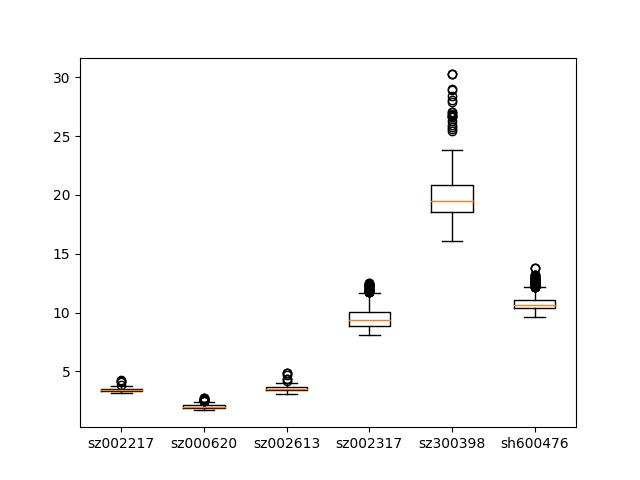

#### As can be seen from the chart, sz002317 has the highest overall mean and the entire box is at the highest and the box is the longest in width, indicating the highest variance and the lowest stability. This means that sz300398 has the highest returnable range, but also the highest risk due to the high and variable share price. sz002217 and sz000620 have about the same stability in comparison, both being at a lower level with a smoother share price, but are more suitable for risk averse investment players as sz000620 has a lower share price and the lowest overall and mean values.

* ### Question 2: Correlation analysis of stock averages and equity numbers

#### The above uses 'return_DF_list' to obtain a list of its data and clean it to obtain the following image:

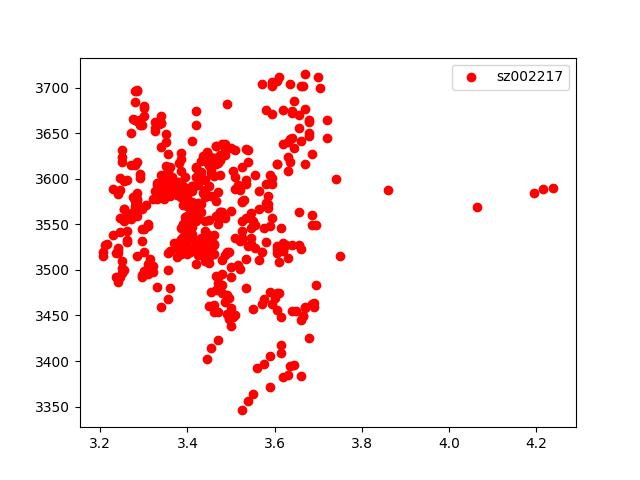

#### From the graph, we can see that the share price of sz002217 is positively correlated with the price of the general market, and from the bottom left corner of the image to the top right is the correlation tendency of the image. The higher the price of the general market, the higher the share price becomes; when the general market moves badly, the share price also falls.

* ### Question 3: The relationship between trading volume and share price (mean) of a stock

#### It can be seen that it is only necessary to obtain the time series as well as the share price, as follows:

In [13]:
def q3(code):
    the_stock_list = return_DF_list(code=code)
    # Trading volume for this period
    v = [float(i) / 39030660 for i in the_stock_list[5]]
    print('\n')
    print(v)
    times = the_stock_list[0]
    aver_price = []
    for i in range(0, len(the_stock_list[0])):
        aver_price.append((float(the_stock_list[2][i]) + float(the_stock_list[3][i])) / 2)
    print(aver_price)
    plt.plot(times, aver_price, color='green', label='aver_price')
    plt.bar(times, v, color='red', label='Volume')
    plt.legend()
    plt.yticks([])  # Removing the y-axis
    plt.xticks([])  # Removing the x-axis
    plt.show()

#### The function 'q3' takes a single argument, 'code'. The function 'return_DF_list' is called to obtain a list of data for this stock. The data list is traversed and since the lowest and highest prices are in the third and fourth columns of the list, this logic is used to extract the lowest and highest prices and average them out into the list. The same can be done for the time list and the volume list.

 < sh600476.csv > The system is checking the value of column label Volumeand row label 500sz002217.csv > The system is checking the value of column label Lowand row label 203< sz002217.csv > The system is checking the value of column label Volumeand row label 268< sz000620.csv > The system is checking the value of column label Timeand row label 167< sz000620.csv > The system is checking the value of column label Timeand row label 175< sz000620.csv > The system is checking the value of column label Timeand row label 466< sz000620.csv > The system is checking the value of column label Closeand row label 54< sz000620.csv > The system is checking the value of column label Closeand row label 190< sz000620.csv > The system is checking the value of column label Closeand row label 406< sz000620.csv > The system is checking the value of column label Closeand row label 438< sz000620.csv > The system is checking the value of column label Volumeand row label 219< sz002613.csv > The system is check

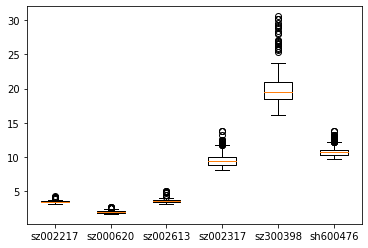

 < sh000001.csv > The system is checking the value of column label Volumeand row label 500sz002217.csv > The system is checking the value of column label Highand row label 169< sz002217.csv > The system is checking the value of column label Highand row label 185< sz002217.csv > The system is checking the value of column label Highand row label 473< sz002217.csv > The system is checking the value of column label Lowand row label 191< sz002217.csv > The system is checking the value of column label Lowand row label 227< sz002217.csv > The system is checking the value of column label Volumeand row label 146< sh000001.csv > The system is checking the value of column label Timeand row label 170< sh000001.csv > The system is checking the value of column label Timeand row label 244< sh000001.csv > The system is checking the value of column label Timeand row label 250< sh000001.csv > The system is checking the value of column label Timeand row label 264< sh000001.csv > The system is checking th

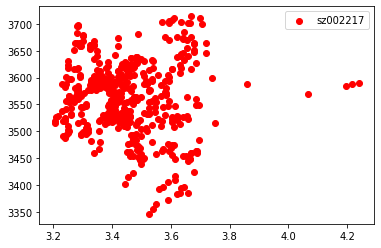

 < sz000620.csv > The system is checking the value of column label Volumeand row label 500sz000620.csv > The system is checking the value of column label Openand row label 375< sz000620.csv > The system is checking the value of column label Highand row label 80< sz000620.csv > The system is checking the value of column label Highand row label 274< sz000620.csv > The system is checking the value of column label Lowand row label 324< sz000620.csv > The system is checking the value of column label Closeand row label 46< sz000620.csv > The system is checking the value of column label Closeand row label 223< sz000620.csv > The system is checking the value of column label Closeand row label 282< sz000620.csv > The system is checking the value of column label Closeand row label 406< sz000620.csv > The system is checking the value of column label Volumeand row label 149< sz000620.csv > The system is checking the value of column label Volumeand row label 201

[0.1616472793439824, 0.250126720890

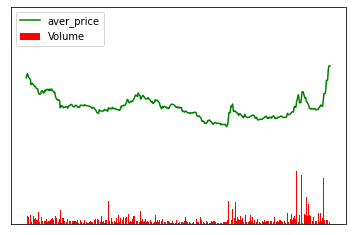



Go to http://127.0.0.1:8001 to view the report
You Get:  b'GET / HTTP/1.1\r\nHost: 127.0.0.1:8001\r\nConnection: keep-alive\r\nUpgrade-Insecure-Requests: 1\r\nAccept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8\r\nUser-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.0 Safari/605.1.15\r\nReferer: http://localhost:8890/\r\nAccept-Language: zh-cn\r\nAccept-Encoding: gzip, deflate\r\n\r\n'


In [ ]:
def handle():
    paths_dict = Setting().return_all_static
    boxplot(paths_dict)
    # Self-selected stocks, manually entered stock codes
    ALL_list = return_DF_list(code='sz002217')
    # SSE index
    ALL_list_sh = return_DF_list(code='sh000001')
    # SSE compared to a certain value against a self selected stock.
    # Types of optional comparisons
    sh_list, stock_list, times_d, types = draw_sh_this(input_list_stock=ALL_list, sh_stock_list=ALL_list_sh, type='close')
    # k-line chart for this period (WEB display)
    k = []
    # all_times = [i for i in ALL_list[0]]
    for i in range(0, len(ALL_list[0])):
        k.append(
            [
            ALL_list[0][i],
            float(ALL_list[1][i]),
            float(ALL_list[2][i]),
            float(ALL_list[3][i]),
            float(ALL_list[4][i]),
            float(ALL_list[5][i])
            ]
        )
    r_d = HTML.replace('@data', str(k)).replace('@title_sh', types).replace('@title_stock', types). \
        replace('@public_times', times_d).replace('@sh_list', sh_list).replace('@stock_list', stock_list)
    q3(code='sz000620')


#### As can be seen from the waveform on the graph, volume and price are positively correlated, with the stock price on a downward trend when volume is at a trough, and a higher slope when volume surges. This characteristic is more pronounced at the turnaround.

    sock = socket.socket()
    port = 8000
    while True:
        try:
            sock.bind(("127.0.0.1", port))
            sock.listen(5)
            print('\n')
            print('Go to http://{0}:{1} to view the report'.format('127.0.0.1', port))
            break
        except:
            port += 1
            continue
    # The main loop processes the user request data and responds accordingly
    while True: # Used to keep listening
        # Receive data
        conn, addr = sock.accept() # hangs until user request is received
        data = conn.recv(1000000000) # Receive user data size
        print("You Get: ", data) # Print the request

        try:
            # Send data
            conn.send(b'HTTP/1.1 200 OK\r\n\r\n')
            conn.send(b'%s' % bytes(r_d, encoding="utf8"))
        except:
            continue

        conn.close()

handle()

# Crawl the data column
# Get the history of the stock with the code sz300546, at 60 minute intervals, for a quantity of 500
# obj = Stock(code='sz300398', datalen=500, scale=60)
# flag = obj.storage_csv
# print(flag)

#### As shown above, code needs to be written to clean the stock data to be analysed. The user will input two stock codes (which must be stored in csv beforehand), get the corresponding list of data via the 'return_DF_list' function, then iterate over it, taking out each piece of data and putting it into the total list; then open the file where the front-end is located via 'open ' to open the file where the front-end is located and replace the data obtained with it, and finally send the replaced data to the socket to the user.

#### Using plt for plotting, the chart for stock code 'sz00060' as an example is shown below.

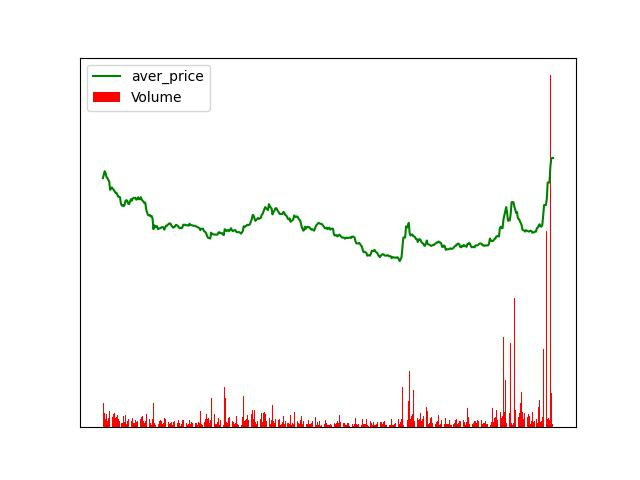

 #### A simple HTTP server was implemented using Python's built-in 'socket' library to display HTML pages.
 #### The program first creates a new socket using 'socket.socket()', then binds the local port '8000' and listens on this port. It then uses 'While True' to keep preparing to receive requests from users. If a user request is received, the HTML file of the display interface is returned to the user.
 ####  r_d is the content of the HTML file of the display interface and needs to be converted to Byte type before it can be sent to the user.

#### Click on the generated URL to see a visual report that facilitates the observation of the interaction data.